# Analyse of equivalent width

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : April 6th  2022
- last update : 


### Configuration Hb :

    


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

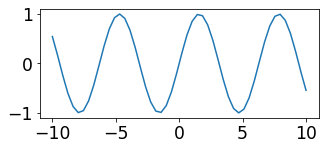

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-04-12'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.2.0'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, HGAMMA, HDELTA,HEPSILON,O2_1,O2B  ,H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

# Function

In [16]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [17]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [19]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [20]:
# path index for each month
DATE="20220317"

In [21]:
version="v5.0"

In [22]:
# Choose the config filename

list_of_spectractorconfigfiles= ["auxtel_configA.ini","auxtel_configB.ini","auxtel_configC.ini","auxtel_configD.ini","auxtel_configE.ini","auxtel_configF.ini","auxtel_configG.ini","auxtel_configHb.ini"]
config_idx =7
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]


In [23]:
configdir 

'configHb'

# Path

In [24]:
HOSTCC=True

In [25]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/holo/"+configdir+"/"+DATE)
    
else:
    #path_auxtel="/Users/dagoret/DATA/AuxTelData2021"
    path_auxtel="/Users/sylvie/DATA/AuxTelDATA2022"
    #path_spectractor=os.path.join(path_auxtel,"/users/dagoret/MacOSX/github/LSST/Spectractor")
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    #path_images=os.path.join(path_auxtel,"holo/quickLookExp_v2/"+DATE)
    path_images=os.path.join(path_auxtel,"holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+configdir+"/"+DATE)
    #path_output_spectractor=os.path.join(path_auxtel,"holo/OutputSpectractor/"+DATE)
    

In [26]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317'

In [27]:
! ls -l $path_output_spectractor

total 0
drwxrws--- 1 dagoret lsst 2 Apr  4 17:54 2022031700237
drwxrws--- 1 dagoret lsst 2 Apr  4 20:16 2022031700238
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700244
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700245
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700251
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700252
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700258
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700259
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700265
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700266
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700272
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700273
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700279
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700280
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700286
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700287
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700293
drwxrws--- 1 dagoret lsst 2 Apr  5 17:25 2022031700294
dr

In [28]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_configHb.ini


## Logbook for file selection

In [29]:
# Logbook for scan data
filename_logbook='logbooks/auxtelholologbook_'+DATE+'_'+ version+'.csv'

In [30]:
df=pd.read_csv(filename_logbook,index_col=0)

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
df

index                     date  \
0       0  2022-03-18T00:51:03.112   
1       1  2022-03-18T00:51:36.190   
2       2  2022-03-18T00:54:30.463   
3       3  2022-03-18T00:55:03.377   
4       4  2022-03-18T00:58:01.707   
5       5  2022-03-18T00:58:34.835   
6       6  2022-03-18T01:01:32.859   
7       7  2022-03-18T01:02:05.775   
8       8  2022-03-18T01:05:03.839   
9       9  2022-03-18T01:05:36.766   
10     10  2022-03-18T01:08:32.232   
11     11  2022-03-18T01:09:05.133   
12     12  2022-03-18T01:12:00.164   
13     13  2022-03-18T01:12:33.079   
14     14  2022-03-18T01:15:32.735   
15     15  2022-03-18T01:16:05.627   
16     16  2022-03-18T01:18:59.663   
17     17  2022-03-18T01:19:32.577   
18     18  2022-03-18T01:22:30.386   
19     19  2022-03-18T01:23:03.286   
20     20  2022-03-18T01:43:39.078   
21     21  2022-03-18T01:44:11.982   
22     22  2022-03-18T01:47:06.515   
23     23  2022-03-18T01:47:39.407   
24     24  2022-03-18T01:50:33.593   
25     25  2022-03-18T01:51:06.516   
26     26  2022-03-18T01:54:00.883   
27     27  2022-03-18T01:54:33.856   
28     28  2022-03-18T01:57:30.505   
29     29  2022-03-18T01:58:03.446   
30     30  2022-03-18T02:01:00.181   
31     31  2022-03-18T02:01:33.339   
32     32  2022-03-18T02:04:30.946   
33     33  2022-03-18T02:05:03.843   
34     34  2022-03-18T02:08:03.232   
35     35  2022-03-18T02:08:36.262   
36     36  2022-03-18T02:11:34.200   
37     37  2022-03-18T02:12:07.156   
38     38  2022-03-18T02:15:00.952   
39     39  2022-03-18T02:15:33.886   
40     40  2022-03-18T02:33:14.260   
41     41  2022-03-18T02:33:47.167   
42     42  2022-03-18T02:36:45.029   
43     43  2022-03-18T02:37:17.962   
44     44  2022-03-18T02:40:14.985   
45     45  2022-03-18T02:40:47.930   
46     46  2022-03-18T02:43:46.361   
47     47  2022-03-18T02:44:19.255   
48     48  2022-03-18T02:47:16.976   
49     49  2022-03-18T02:47:49.912   
50     50  2022-03-18T02:50:52.460   
51     51  2022-03-18T02:51:25.626   
52     52  2022-03-18T03:08:55.717   
53     53  2022-03-18T03:09:28.629   
54     54  2022-03-18T03:13:08.467   
55     55  2022-03-18T03:13:41.360   
56     56  2022-03-18T03:17:20.920   
57     57  2022-03-18T03:17:53.934   
58     58  2022-03-18T03:21:41.018   
59     59  2022-03-18T03:22:14.022   

                                               path  \
0   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
1   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
2   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
3   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
4   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
5   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
6   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
7   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
8   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
9   /sps/lsst/groups/auxtel/data/2022/holo/20220317   
10  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
11  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
12  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
13  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
14  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
15  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
16  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
17  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
18  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
19  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
20  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
21  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
22  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
23  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
24  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
25  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
26  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
27  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
28  /sps/lsst/groups/auxtel/data/2022/holo/20220317   
29  /sps/lsst/groups/auxtel/data/20

## Selection of input files

In [33]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [34]:
df_good=df
df_good["quality"] = 1

In [35]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031700237_postisrccd.fits
exposure_2022031700238_postisrccd.fits
exposure_2022031700244_postisrccd.fits
exposure_2022031700245_postisrccd.fits
exposure_2022031700251_postisrccd.fits
exposure_2022031700252_postisrccd.fits
exposure_2022031700258_postisrccd.fits
exposure_2022031700259_postisrccd.fits
exposure_2022031700265_postisrccd.fits
exposure_2022031700266_postisrccd.fits
exposure_2022031700272_postisrccd.fits
exposure_2022031700273_postisrccd.fits
exposure_2022031700279_postisrccd.fits
exposure_2022031700280_postisrccd.fits
exposure_2022031700286_postisrccd.fits
exposure_2022031700287_postisrccd.fits
exposure_2022031700293_postisrccd.fits
exposure_2022031700294_postisrccd.fits
exposure_2022031700300_postisrccd.fits
exposure_2022031700301_postisrccd.fits
exposure_2022031700309_postisrccd.fits
exposure_2022031700310_postisrccd.fits
exposure_2022031700316_postisrccd.fits
exposure_2022031700317_postisrccd.fits
exposure_2022031700323_postisrccd.fits
exposure_2022031700324_po

## Selection of Spectractor output files

In [36]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [37]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031700237', '2022031700238', '2022031700244', '2022031700245', '2022031700251', '2022031700252', '2022031700258', '2022031700259', '2022031700265', '2022031700266', '2022031700272', '2022031700273', '2022031700279', '2022031700280', '2022031700286', '2022031700287', '2022031700293', '2022031700294', '2022031700300', '2022031700301', '2022031700309', '2022031700310', '2022031700316', '2022031700317', '2022031700323', '2022031700324', '2022031700330', '2022031700331', '2022031700337', '2022031700338', '2022031700344', '2022031700345', '2022031700351', '2022031700352', '2022031700358', '2022031700359', '2022031700365', '2022031700366', '2022031700372', '2022031700373', '2022031700379', '2022031700380', '2022031700386', '2022031700387', '2022031700393', '2022031700394', '2022031700400', '2022031700401', '2022031700407', '2022031700408', '2022031700414', '2022031700415', '2022031700421', '2022031700422', '2022031700428', '2022031700429', '2022031700435', '2022031

In [38]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700251/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700252/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700265/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700272/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700273/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700279/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700286/

In [39]:
config

'./config/auxtel_configHb.ini'

## Extraction of spectra

In [40]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [41]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_spectrum.fits']

In [42]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_spectrogram.fits']

In [43]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_lines.csv']

In [44]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700245/basespec/exposure_2022031700245_postisrccd_table.csv']

## Selection of good spectra

In [45]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [46]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

0 ) exposure_2022031700238_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700238/basespec/exposure_2022031700238_postisrccd_spectrum.fits
set date_obs to 2022-03-18T00:51:22.049
set expo to 20.0
set airmass to 1.11557476948966
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1753951396614214
set dec to -32.3064444444444
set hour_angle to 30.8762989508295
set temperature to 8.9
set pressure to 743.45
set humidity to 48.0
set lambda_ref to 626.6801216985461
set parallactic_angle to 93.8012496664173


/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                           
--------- ------------- ------------- ... --------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ... 0.0003640                1
1 ) exposure_2022031700244_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700244/basespec/exposure_2022031700244_postisrccd_spectrum.fits
set date_obs to 2022-03-18T00:54:16.312
set expo to 20.0
set airmass to 1.121576965054115
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1741806116248446
set dec to -32.3064444444444
set hour_angle to 31.60492174100415
set temperature to 8.9
set pressure to 743.45
set humidity to 49.0
set lambda_ref to 626.883564656571
set parallactic_angle to 94.10618686949074
target_name = mu.col, Selected object name for Simbad : m

/tmp/ipykernel_2317/1061354010.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(16,4))


set date_obs to 2022-03-18T02:04:16.794
set expo to 20.0
set airmass to 1.33727547076682
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1388486262435704
set dec to -32.3064444444444
set hour_angle to 49.15879882143194
set temperature to 8.5
set pressure to 743.45
set humidity to 58.0
set lambda_ref to 628.5424256920012
set parallactic_angle to 100.7251843777299
target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ... Z_VALUE_21 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ...  0.0003640                1
21 ) exposure_2022031700352_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configHb/20220317/2022031700352/basespec/exposure_2022031700352_postisrccd_spectrum.fits
set date_obs to 2022-03-18T02:04:49.712
set expo to 

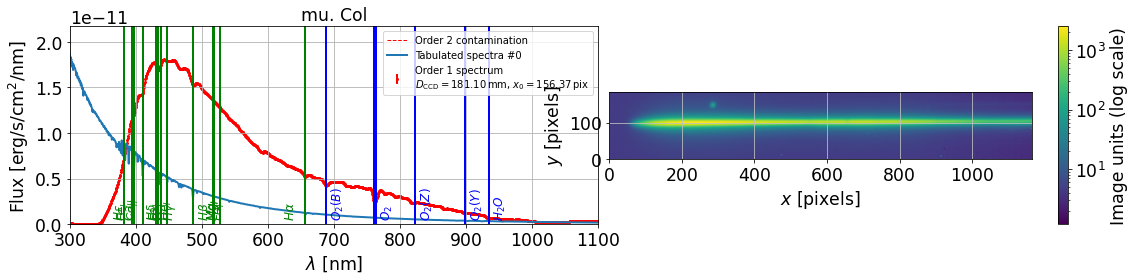

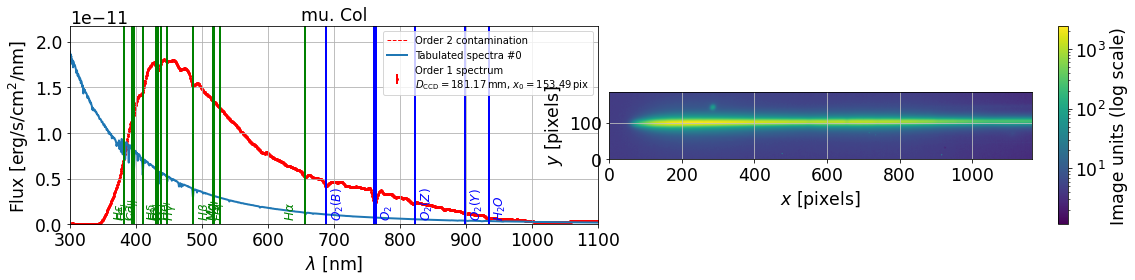

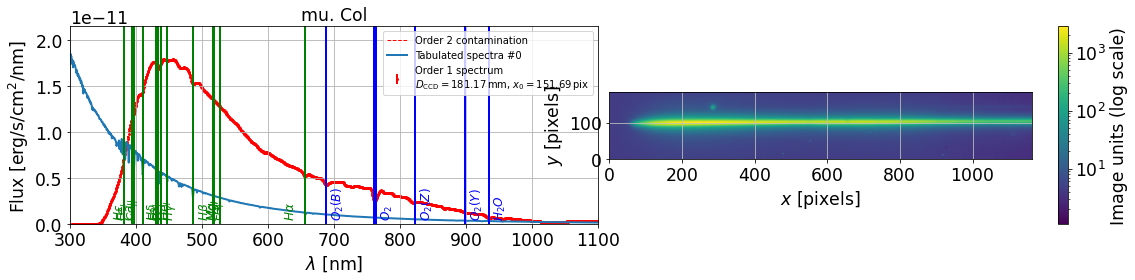

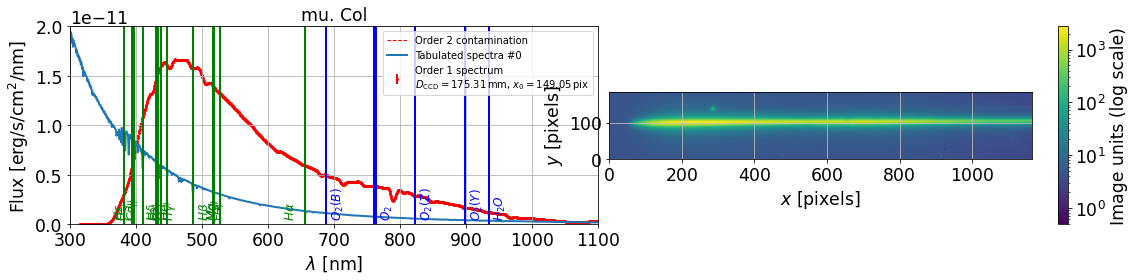

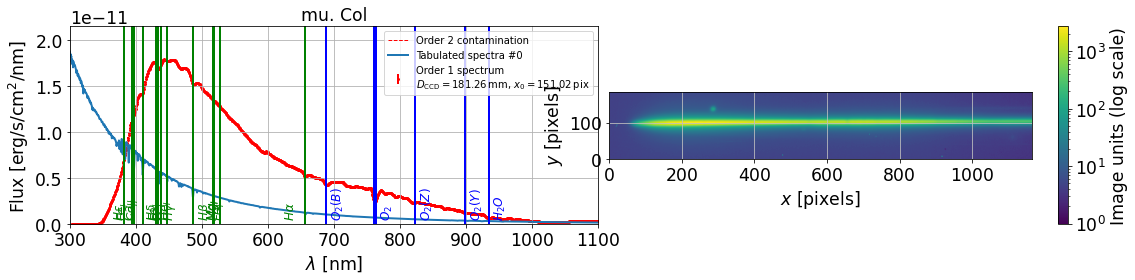

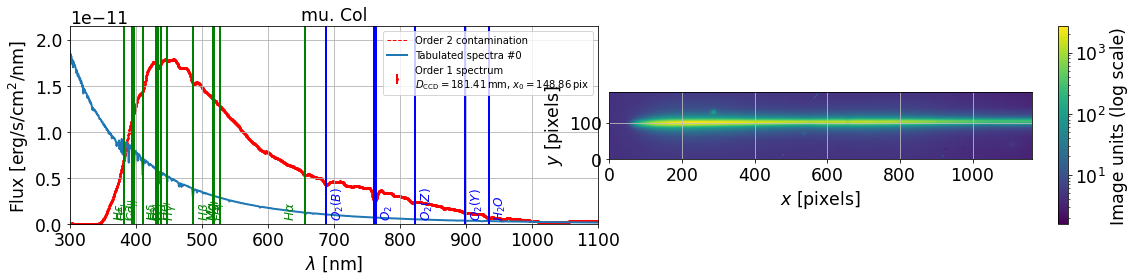

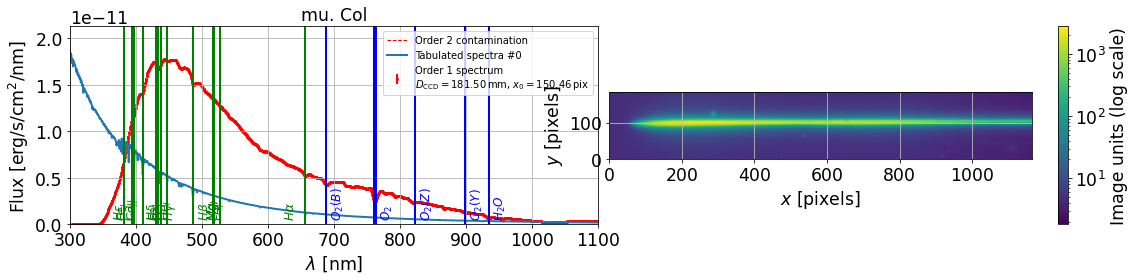

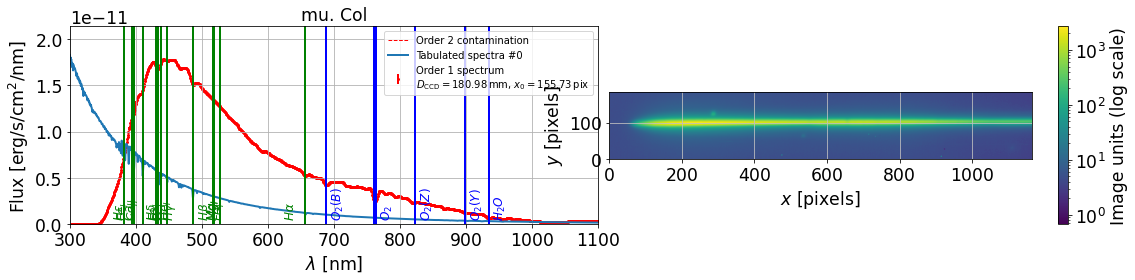

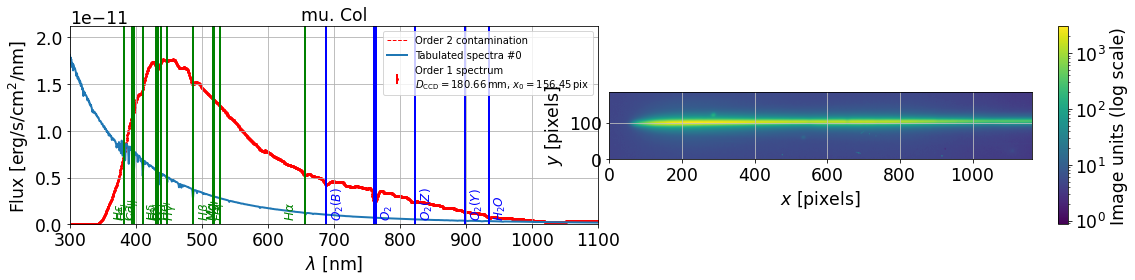

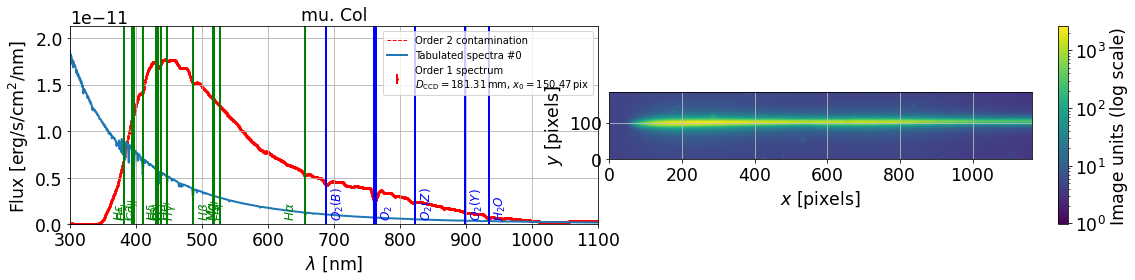

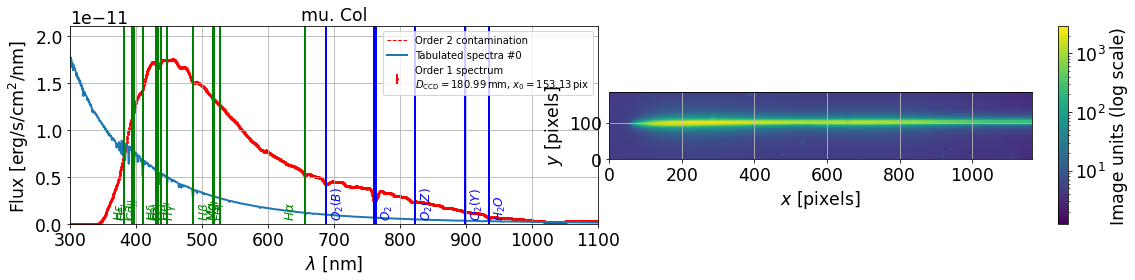

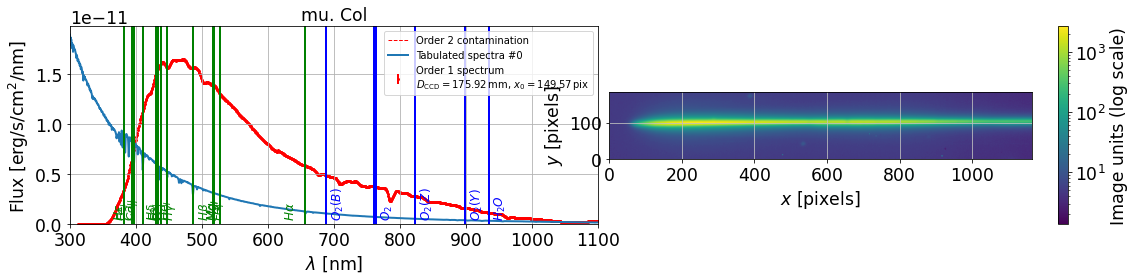

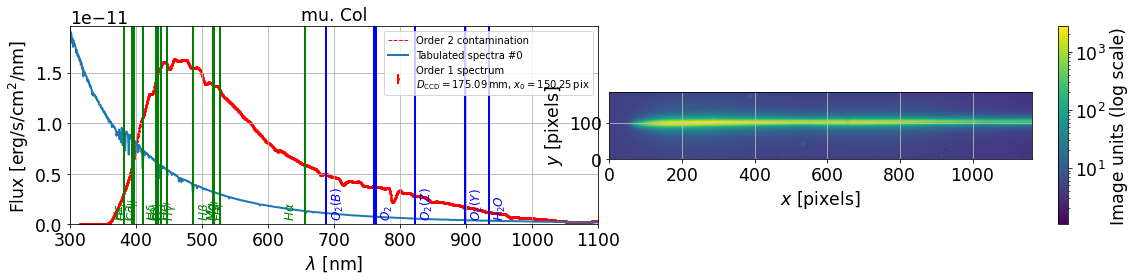

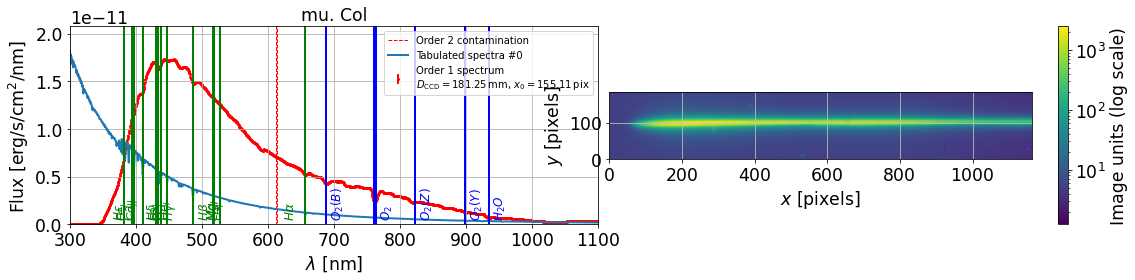

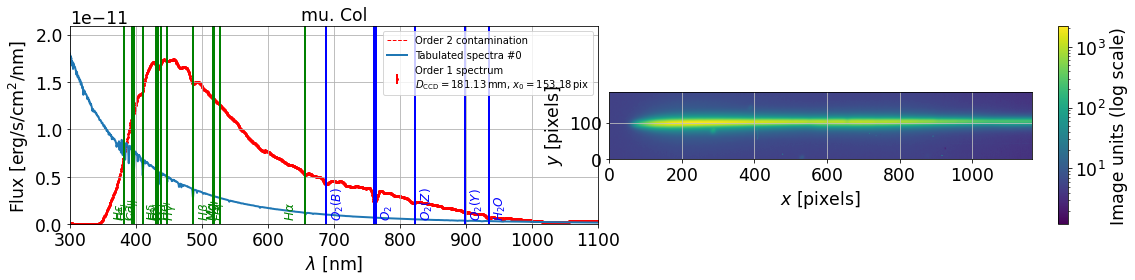

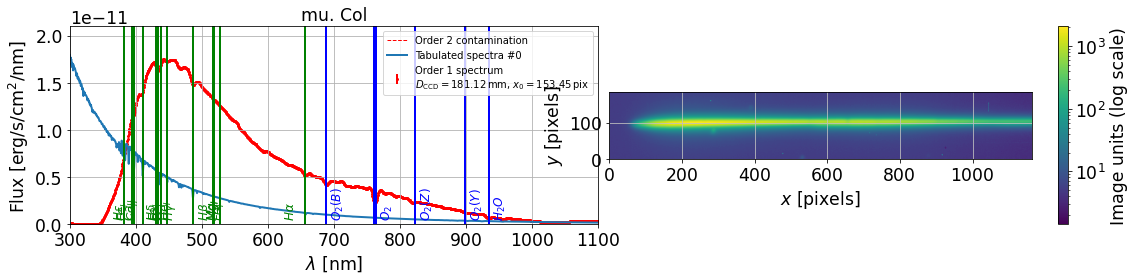

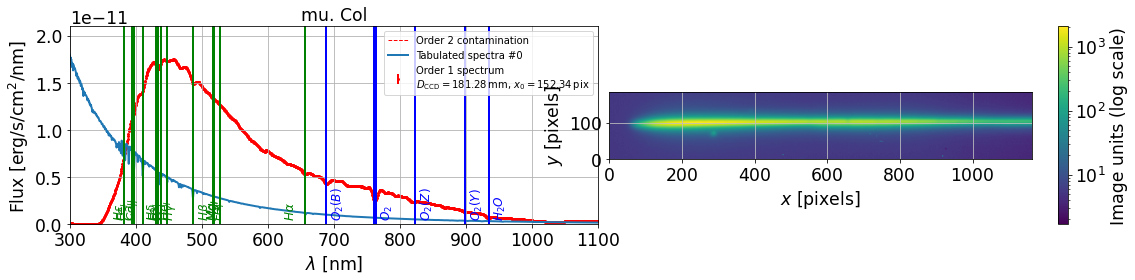

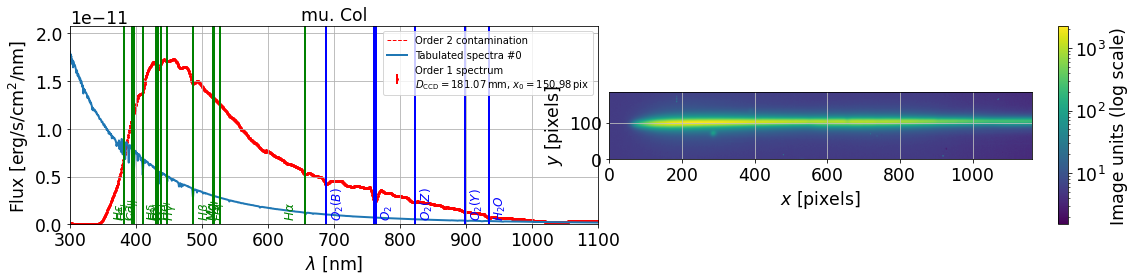

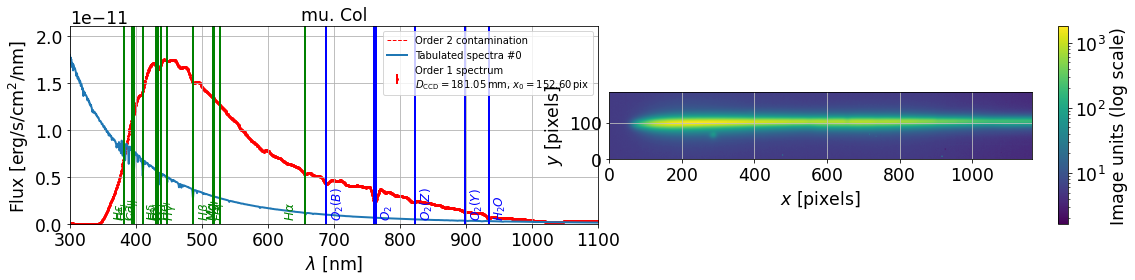

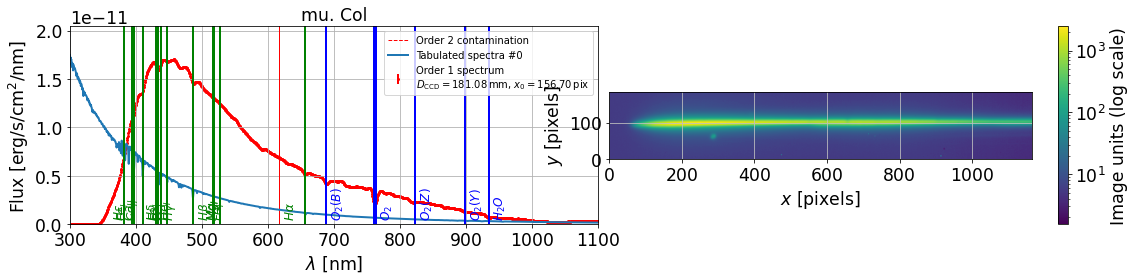

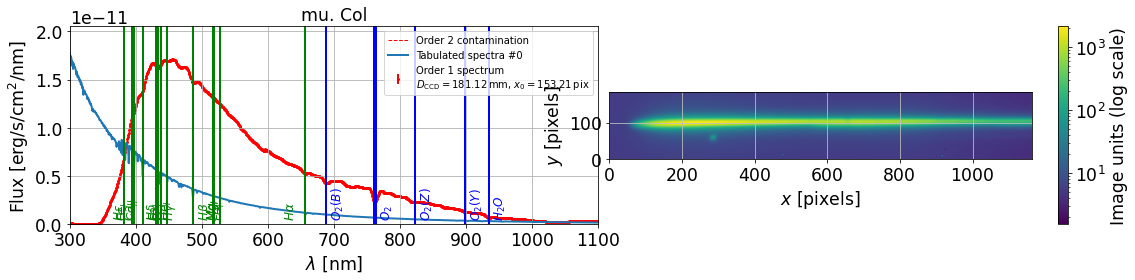

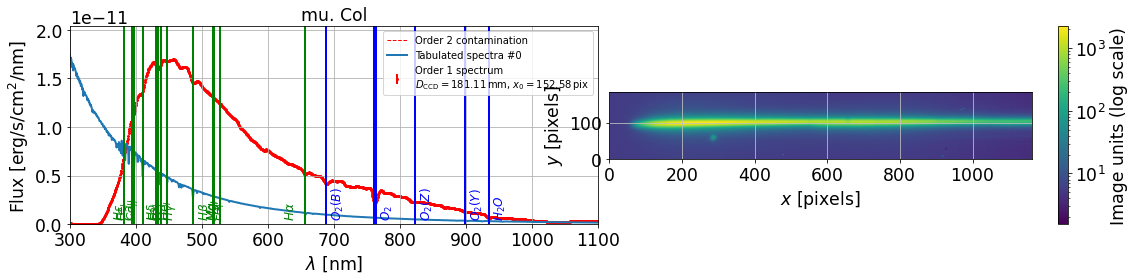

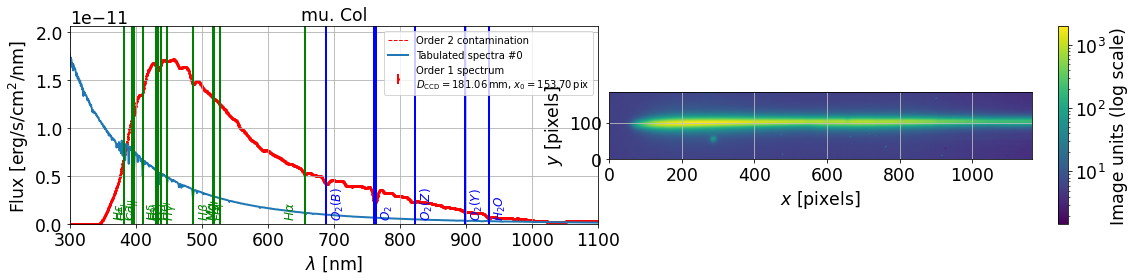

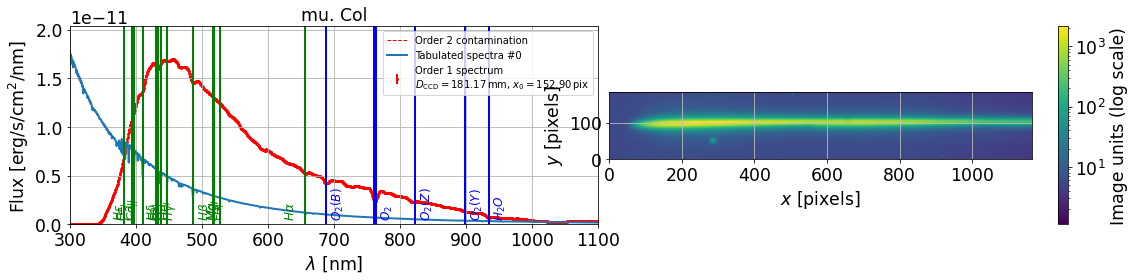

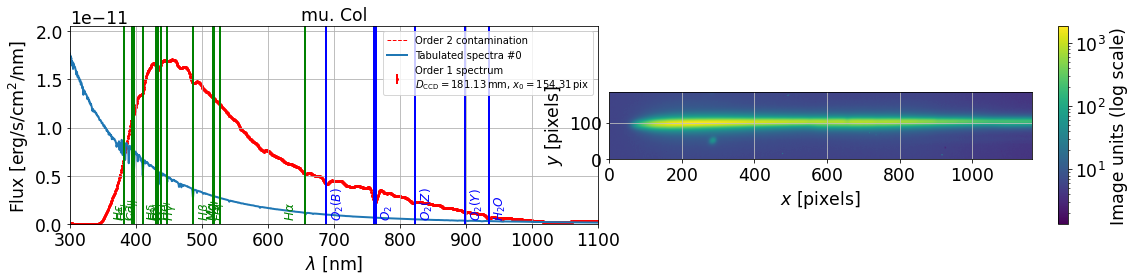

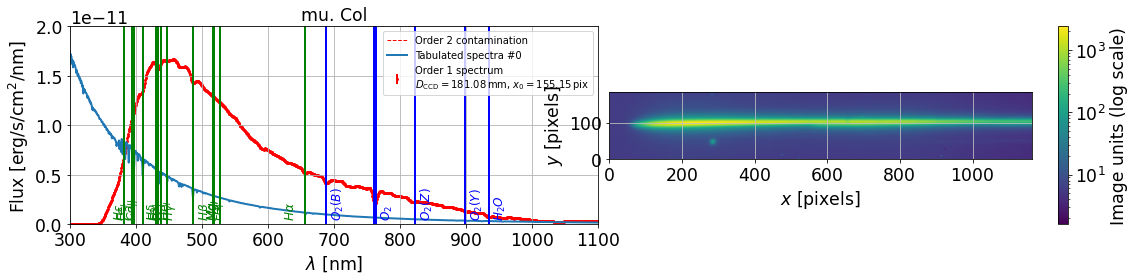

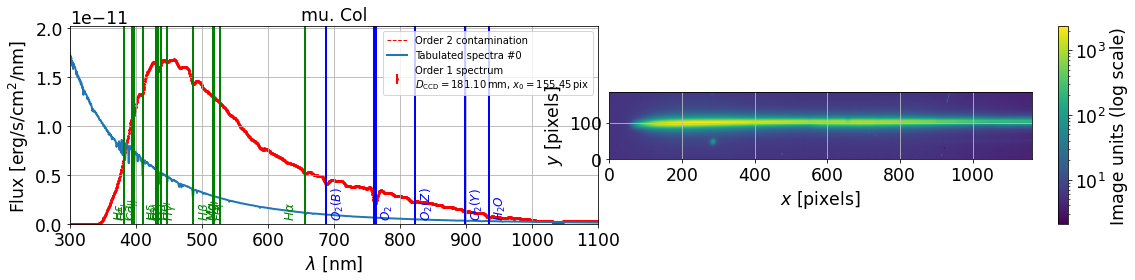

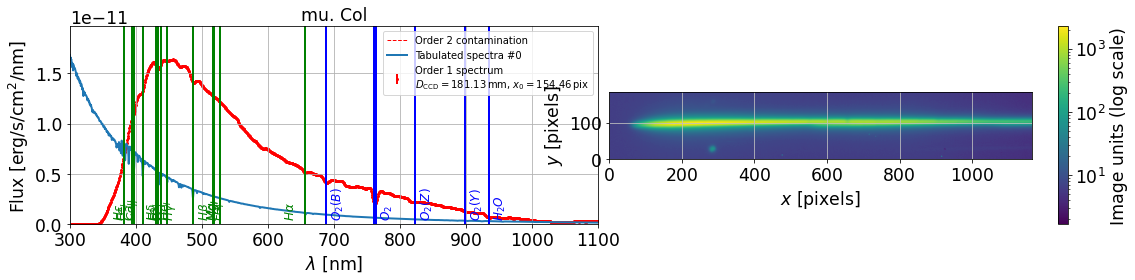

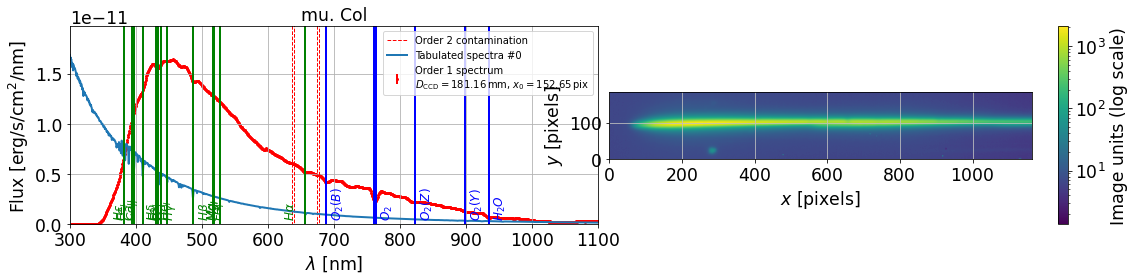

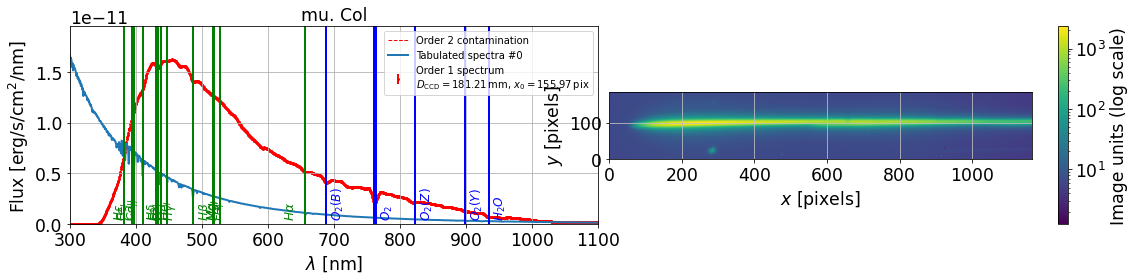

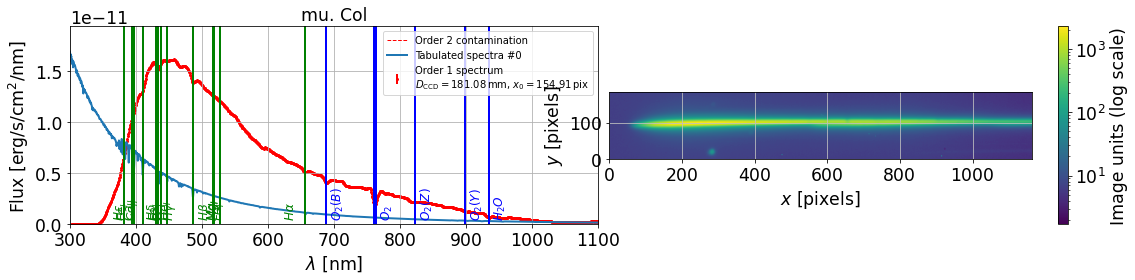

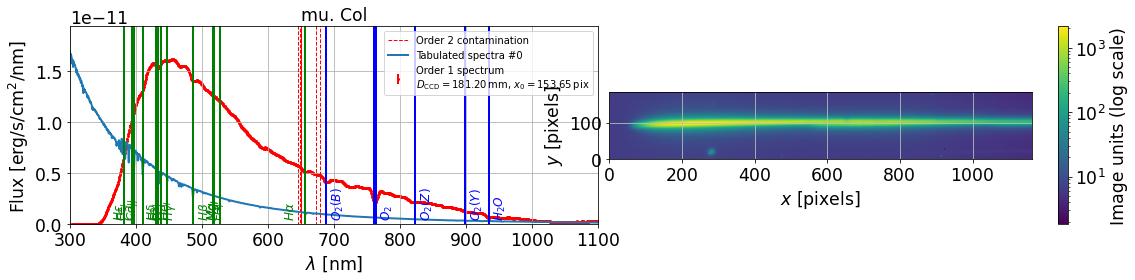

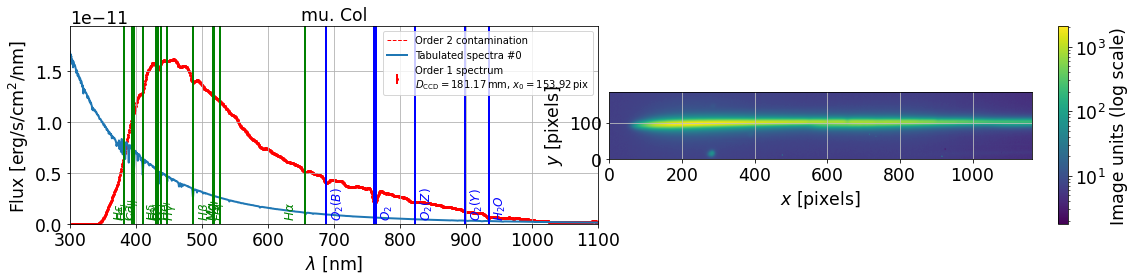

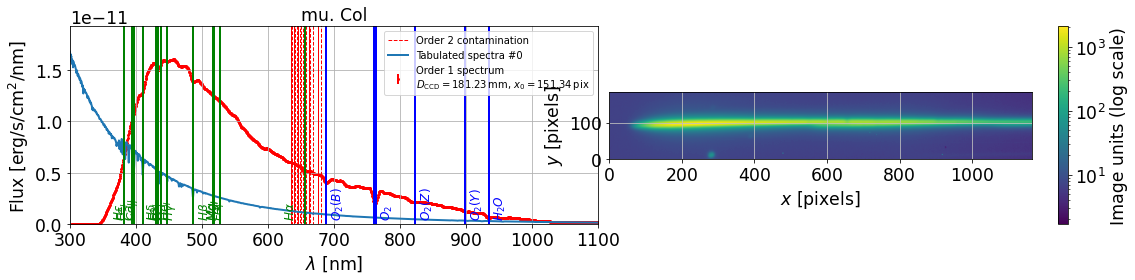

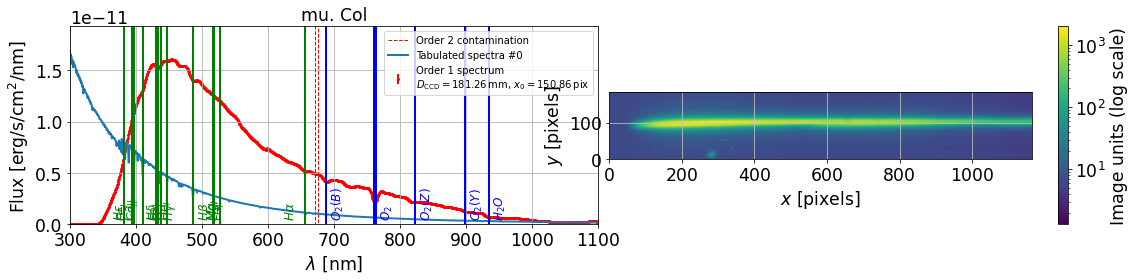

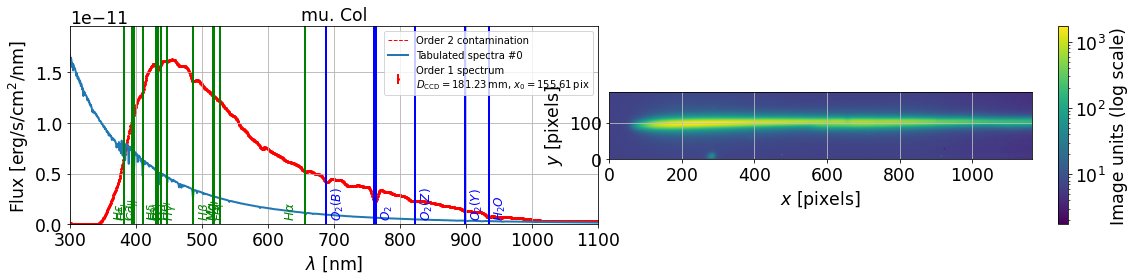

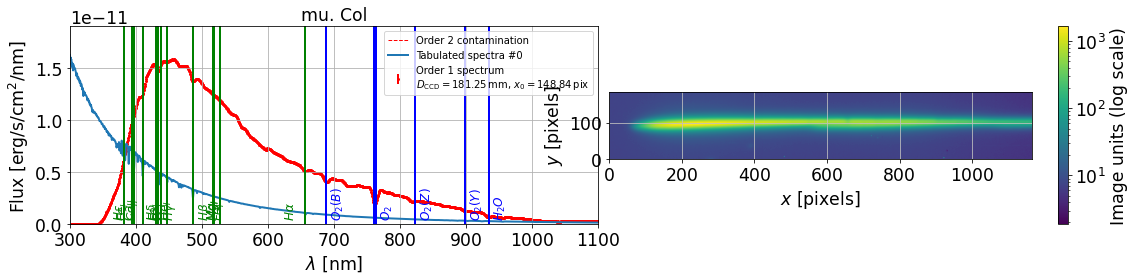

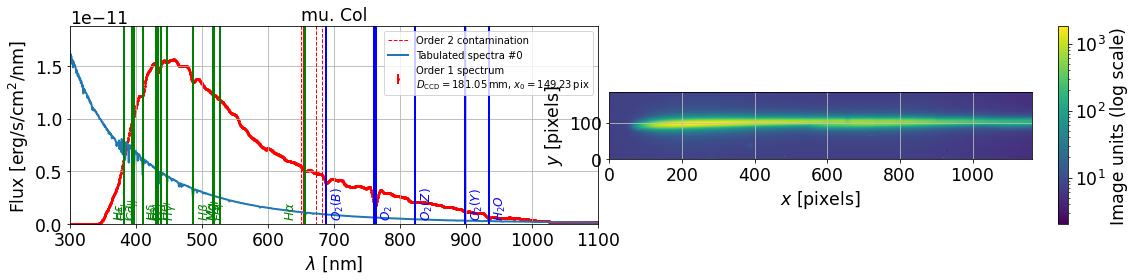

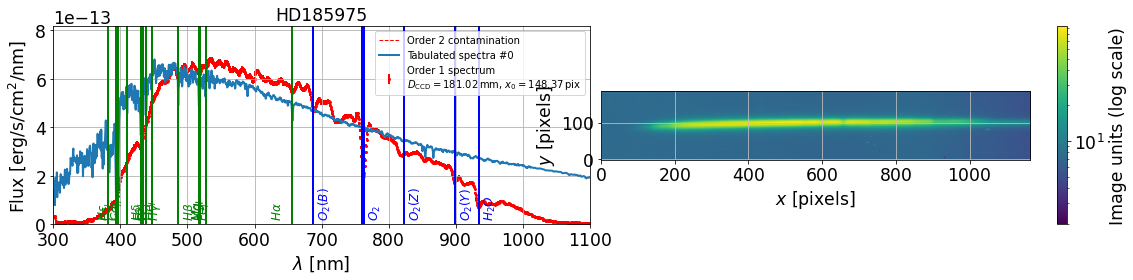

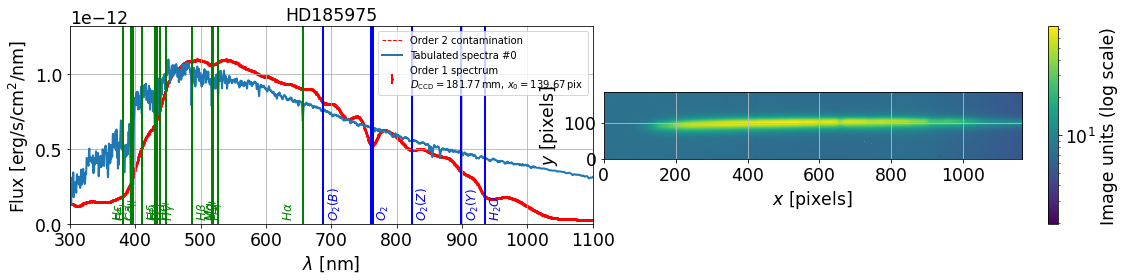

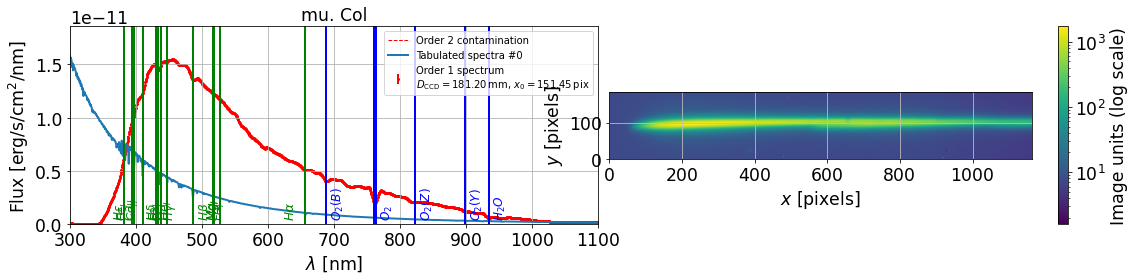

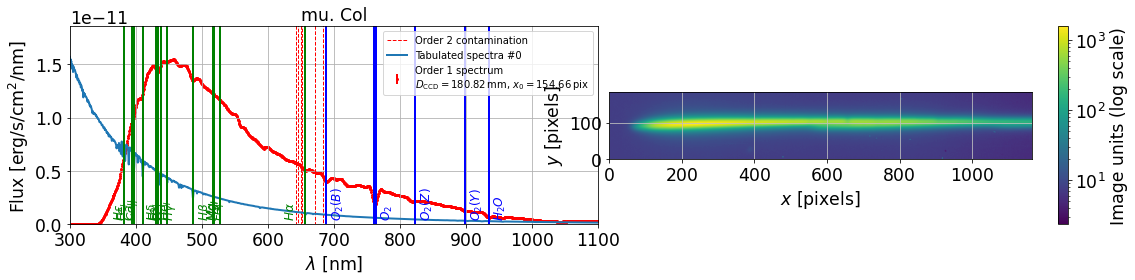

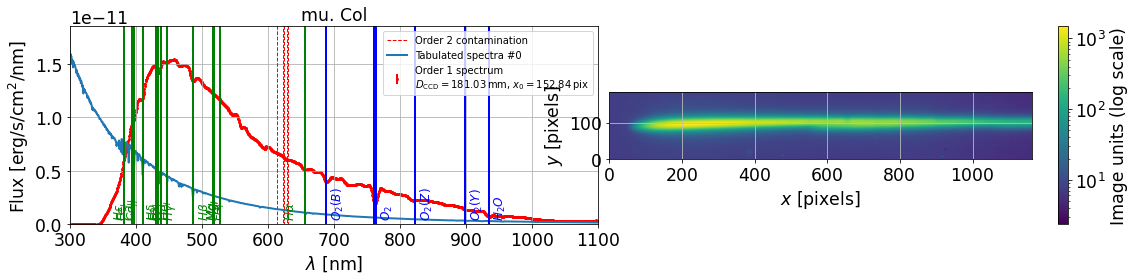

In [ ]:
parameters.DISPLAY=True
FLAG_ORDER2 = True



infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]

if FLAG_ORDER2:
    all_lambdas_order2=[]
    all_data_order2=[]
    all_data_err_order2=[]
    
    
all_num=[]
all_figs = []

idx=0
for fullfilename in all_good_spectra_spectrum_files:
    
    filename = os.path.basename(fullfilename)
    print(idx,")",filename," ",fullfilename)
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    
   
     
    s=Spectrum(fullfilename, config=config,fast_load=False)
    label=filename.split('.')[0]+" "
    #s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    s.plot_spectrum(ax=ax1,force_lines=True)
    
    all_lambdas.append(s.lambdas)
    all_data.append(s.data)
    all_data_err.append(s.err)
    
    if FLAG_ORDER2:
        all_lambdas_order2.append(s.lambdas_order2)
        all_data_order2.append(s.data_order2)
        all_data_err_order2.append(s.err_order2)
    
    ax2 = fig.add_subplot(1, 2, 2)
    
    fullfilename2=all_files_spectrogram[idx]
    
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    
    infos.append([idx,tag,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
    plt.show()
    all_figs.append(fig)
    
    idx+=1
    

## View one spectrum

In [ ]:
idx=1

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
#s.plot_spectrum(ax=ax1,force_lines=True,label=label)
s.plot_spectrum(ax=ax1,force_lines=True)
    
plt.show()
    

In [ ]:
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(all_lambdas[idx],all_data[idx],'r-')
ax1.set_xlim(550,1000)
ax1.grid(b=True, which='major', color='b', linestyle='-')
ax1.grid(b=True, which='minor', color='grey', linestyle='-')


## Info

In [ ]:
df_infos=pd.DataFrame(infos,columns=["idx","num","object","date_obs","airmass","temperature","pressure","humidity"])

In [ ]:
df_infos.set_index('idx',inplace=True)

In [ ]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [ ]:
all_reftime=np.array(all_reftime)

In [ ]:
df_infos["reftime"]=all_reftime

In [ ]:
df_infos["eqw_h2o"] = np.nan
df_infos["eqw_h2o_2"] = np.nan
df_infos["eqw_h2o_3"] = np.nan
df_infos["eqw_o2"] = np.nan
df_infos["eqw_o2b"] = np.nan
df_infos["eqw_halpha"] = np.nan
df_infos["eqw_hbeta"] = np.nan
df_infos["eqw_hgamma"] = np.nan

#df_infos["eqw_o2_spec"] = np.nan

In [ ]:
df_infos

In [ ]:
NN = len(df_infos)

## Equivalent width

In [ ]:
from astropy import units as u
from astropy.visualization import quantity_support

quantity_support()  # for getting units on the axes below  

In [ ]:
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum,fit_continuum
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from astropy.modeling import models
from specutils.manipulation import extract_region

In [ ]:
IDXSEL=1
filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
thetitle=str(IDXSEL)+") "+filename_SEL

In [ ]:
s=Spectrum(fullfilename_SEL, config=config)
s.load_spectrogram(fullfilename_spectrogram_SEL) 

In [ ]:
lines = Lines([O2_1,H2O_1,H2O_2],atmospheric_lines=True, redshift=0, emission_spectrum=False)

In [ ]:
s.lines = lines

In [ ]:
lambdas = np.arange(300,1000,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)

In [ ]:
#global_chisq = detect_lines(lines, s.lambdas, s.data, s.err, fwhm_func=fwhm_func)

In [ ]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

In [ ]:
def ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=None,ax2=None):
    """
    """
       # line central position        
    wlline0 = np.average([wlminline.value,wlmaxline.value])
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
    
    
    # work with inset
    idx_inset0 = np.where(np.logical_and(spec.spectral_axis>wlminline , spec.spectral_axis<wlmaxline))[0]
    idx_inset1 = np.where(np.logical_and(spec.spectral_axis>wlmin , spec.spectral_axis<wlmax))[0]
    
    
    wl_inset0 = spec.spectral_axis[idx_inset0]
    wl_inset1 = spec.spectral_axis[idx_inset1]
    
    fluxratio_inset0 = 1-cont_norm_spec.flux[idx_inset0]
    fluxratio_inset1 = 1-cont_norm_spec.flux[idx_inset1]
    
    # compute equivalent width by integration of (1-fluxratio(wl)) dwl
    eqw3 = np.trapz(fluxratio_inset0,wl_inset0)
    
    
    eqw1=equivalent_width(cont_norm_spec, regions=line_region) 
    eqw2=equivalent_width(cont_norm_spec, regions=sub_region)  
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\AA$ ".format(eqw1.value)
        eqw_str2="$Eqw_2$ = {:2.2f} $\AA$ ".format(eqw2.value)
        eqw_str3="$Eqw_3$ = {:2.2f} $\AA$ ".format(eqw3.value)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2),
        r'{}'.format(eqw_str3)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        if wlline0 > 7000:
            ax2.text(0.05, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        else:
            ax2.text(0.55, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
                    
        
        # plot insert  on right figure
        if wlline0 > 7000:
            loc=2
        else:
            loc=1
        
        axins = inset_axes(ax2,
                    width="42%", # width = 30% of parent_bbox
                    height="42%", # height : 1 inch
                    loc=loc)
        axins.plot(spec.spectral_axis[idx_inset1], cont_norm_spec.flux[idx_inset1],'b-')
        axins.plot(spec.spectral_axis[idx_inset0], cont_norm_spec.flux[idx_inset0],'r-o')
        
        #axins.plot(wl_inset1, fluxratio_inset1,'b-')
        #axins.plot(wl_inset0, fluxratio_inset0,'r-o')
            
        
        axins.grid()
        
        
        
        # plot insert  on right figure
        if wlline0 > 7000:
            loc=3
        else:
            loc=4
        
        axins1 = inset_axes(ax1,
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    loc=loc)
        axins1.plot(spec.spectral_axis[idx_inset1], cont_norm_spec.flux[idx_inset1],'b-')
        axins1.plot(spec.spectral_axis[idx_inset0], cont_norm_spec.flux[idx_inset0],'r-o')
        
        #axins.plot(wl_inset1, fluxratio_inset1,'b-')
        #axins.plot(wl_inset0, fluxratio_inset0,'r-o')
            
        
        axins1.grid()
        
        
        
        
        
        
        
        
    return eqw1.value,eqw2.value,eqw3.value     

    

In [ ]:
def ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=None,ax2=None):
    """
    
    ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True)
    
    - input :
    
    
    - output :
    
    """
    # line central position        
    wlline0 = np.average([wlminline.value,wlmaxline.value])
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
    
    eqw1=equivalent_width(cont_norm_spec, regions=line_region) 
    eqw2=equivalent_width(cont_norm_spec, regions=sub_region)  
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\AA$ ".format(eqw1.value)
        eqw_str2="$Eqw_2$ = {:2.2f} $\AA$ ".format(eqw2.value)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        if wlline0 > 7000:
            ax2.text(0.05, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        else:
            ax2.text(0.55, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
            
            
        idx_inset0 = np.where(np.logical_and(spec.spectral_axis>wlminline , spec.spectral_axis<wlmaxline))[0]
        idx_inset1 = np.where(np.logical_and(spec.spectral_axis>wlmin , spec.spectral_axis<wlmax))[0]
        
       
        if wlline0 > 7000:
            loc=4
        else:
            loc=2
        
        axins = inset_axes(ax2,
                    width="42%", # width = 30% of parent_bbox
                    height="42%", # height : 1 inch
                    loc=loc)
        axins.plot(spec.spectral_axis[idx_inset1], cont_norm_spec.flux[idx_inset1],'b-')
        axins.plot(spec.spectral_axis[idx_inset0], cont_norm_spec.flux[idx_inset0],'r-o')
        axins.grid()
        
        
    return eqw1.value,eqw2.value     


In [ ]:
def ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=None,ax2=None):
    """
    
    ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline)
    
    - input :
    
    
    - output :
    
    """
    
    # line central position        
    wlline0 = np.average([wlminline.value,wlmaxline.value])
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
         
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
       
    eqw10=equivalent_width(cont_norm_spec, regions=line_region).value 
    eqw20=equivalent_width(cont_norm_spec, regions=sub_region).value 
    
    
    
    
    # work with inset
    idx_inset0 = np.where(np.logical_and(spec.spectral_axis>wlminline , spec.spectral_axis<wlmaxline))[0]
    idx_inset1 = np.where(np.logical_and(spec.spectral_axis>wlmin , spec.spectral_axis<wlmax))[0]
    
    
    wl_inset0 = spec.spectral_axis[idx_inset0]
    wl_inset1 = spec.spectral_axis[idx_inset1]
    
    fluxratio_inset0 = 1-cont_norm_spec.flux[idx_inset0]
    fluxratio_inset1 = 1-cont_norm_spec.flux[idx_inset1]
    
    # compute equivalent width by integration of (1-fluxratio(wl)) dwl
    eqw30 = np.trapz(fluxratio_inset0,wl_inset0)
    
    
    
       
    # Bootstrap
    
    
    eqw1_set=np.zeros(NN)
    eqw2_set=np.zeros(NN)
    eqw3_set=np.zeros(NN)
    
    
    size=len(specerr.flux)
    
    # loop on trials 
    for idx in np.arange(NN):
        
        # random generator for errors
        s = np.random.normal(0, 1, size)
        
        # new flux
        newspec = Spectrum1D(spectral_axis=spec.spectral_axis, flux=spec.flux+specerr.flux*s)
              
    
        # region where one extract the spectrum
        sub_spectrum = extract_region(newspec, sub_region)
    
        # initialisaition of linear model
        g_init = models.Linear1D(slope=0,intercept=1e-12)
    
        # fit on sub-spectrum
        g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
        # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
        g2_fit = fit_continuum(newspec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
        y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
        y_continuum_fitted2 = g2_fit(newspec.spectral_axis)
    
        # normalize the spectrum
        cont_norm_spec = newspec/ y_continuum_fitted2 
    
    
        eqw1_b=equivalent_width(cont_norm_spec, regions=line_region) 
        eqw2_b=equivalent_width(cont_norm_spec, regions=sub_region) 
        
        
        eqw1_set[idx]=eqw1_b.value
        eqw2_set[idx]=eqw2_b.value
        
        # work with inset
        idx_inset0 = np.where(np.logical_and(newspec.spectral_axis>wlminline , newspec.spectral_axis<wlmaxline))[0]
        idx_inset1 = np.where(np.logical_and(newspec.spectral_axis>wlmin , newspec.spectral_axis<wlmax))[0]
    
    
        wl_inset0 = newspec.spectral_axis[idx_inset0]
        wl_inset1 = newspec.spectral_axis[idx_inset1]
    
        fluxratio_inset0 = 1-cont_norm_spec.flux[idx_inset0]
        fluxratio_inset1 = 1-cont_norm_spec.flux[idx_inset1]
    
        # compute equivalent width by integration of (1-fluxratio(wl)) dwl
        eqw3_b = np.trapz(fluxratio_inset0,wl_inset0)
        eqw3_set[idx]=eqw3_b.value
        
     
    eqw1_std=eqw1_set.std()
    eqw2_std=eqw2_set.std()
    eqw3_std=eqw3_set.std()
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw10,eqw1_std)
        eqw_str2="$Eqw_2$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw20,eqw2_std)
        eqw_str3="$Eqw_3$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw30,eqw3_std)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2),
        r'{}'.format(eqw_str3)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        
        if wlline0 > 7000:
            ax2.text(0.05, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        else:
            ax2.text(0.55, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        
        
               
        
    return eqw10,eqw20,eqw30,eqw1_set,eqw2_set,eqw3_set      


In [ ]:
def ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=None,ax2=None):
    """
    
    ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline)
    
    - input :
    
    
    - output :
    
    """
    
    # line central position        
    wlline0 = np.average([wlminline.value,wlmaxline.value])
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
         
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
       
    eqw10=equivalent_width(cont_norm_spec, regions=line_region).value 
    eqw20=equivalent_width(cont_norm_spec, regions=sub_region).value 
       
    # Bootstrap
    
    
    eqw1_set=np.zeros(NN)
    eqw2_set=np.zeros(NN)
    size=len(specerr.flux)
    
    # loop on trials 
    for idx in np.arange(NN):
        
        # random generator for errors
        s = np.random.normal(0, 1, size)
        
        # new flux
        newspec = Spectrum1D(spectral_axis=spec.spectral_axis, flux=spec.flux+specerr.flux*s)
              
    
        # region where one extract the spectrum
        sub_spectrum = extract_region(newspec, sub_region)
    
        # initialisaition of linear model
        g_init = models.Linear1D(slope=0,intercept=1e-12)
    
        # fit on sub-spectrum
        g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
        # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
        g2_fit = fit_continuum(newspec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
        y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
        y_continuum_fitted2 = g2_fit(newspec.spectral_axis)
    
        # normalize the spectrum
        cont_norm_spec = newspec/ y_continuum_fitted2 
    
    
        eqw1_b=equivalent_width(cont_norm_spec, regions=line_region) 
        eqw2_b=equivalent_width(cont_norm_spec, regions=sub_region) 
        
        
        eqw1_set[idx]=eqw1_b.value
        eqw2_set[idx]=eqw2_b.value
        
     
    eqw1_std=eqw1_set.std()
    eqw2_std=eqw2_set.std()
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw10,eqw1_std)
        eqw_str2="$Eqw_2$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw20,eqw2_std)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        
        if wlline0 > 7000:
            ax2.text(0.05, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        else:
            ax2.text(0.55, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        
        if wlline0 > 7000:
            loc=2
        else:
            loc=1
            
        idx_inset0 = np.where(np.logical_and(spec.spectral_axis>wlminline , spec.spectral_axis<wlmaxline))[0]
        idx_inset1 = np.where(np.logical_and(spec.spectral_axis>wlmin , spec.spectral_axis<wlmax))[0]
        
        axins = inset_axes(ax2,
                    width="42%", # width = 30% of parent_bbox
                    height="42%", # height : 1 inch
                    loc=loc)
        axins.plot(spec.spectral_axis[idx_inset1], cont_norm_spec.flux[idx_inset1],'b-')
        axins.plot(spec.spectral_axis[idx_inset0], cont_norm_spec.flux[idx_inset0],'r-o')
        axins.grid()
     
               
        
    return eqw10,eqw20,eqw1_set,eqw2_set     


## Setup boundaries for equivalent width

### O2 line

In [ ]:
wlmin=10*(O2_1.wavelength-30)*u.AA
wlmax=10*(O2_1.wavelength+30)*u.AA
wlminline=10*(O2_1.wavelength-7)*u.AA
wlmaxline=10*(O2_1.wavelength+9)*u.AA

In [ ]:
wlmin_o2 = wlmin
wlmax_o2 = wlmax
wlminline_o2 = wlminline
wlmaxline_o2 = wlmaxline

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color="b");
ax2.axvline(eqw20,color='r')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(eq3_set,bins=50,histtype='step',color="b");
ax3.axvline(eqw30,color='r')
plt.suptitle(thetitle)

In [ ]:
eqw_o2_err=eq3_set.std()
eqw_o2_err

### O2B Line

In [ ]:
wlmin=10*(O2B.wavelength-30)*u.AA
wlmax=10*(O2B.wavelength+30)*u.AA
wlminline=10*(O2B.wavelength-7)*u.AA
wlmaxline=10*(O2B.wavelength+9)*u.AA

In [ ]:
wlmin_o2b = wlmin
wlmax_o2b = wlmax
wlminline_o2b = wlminline
wlmaxline_o2b = wlmaxline

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
eqw_o2b_err=eq3_set.std()
eqw_o2b_err

### H2O line

In [ ]:
wlmin=10*(H2O_1.wavelength-30)*u.AA
wlmax=10*(H2O_2.wavelength+58)*u.AA
wlminline=10*(H2O_1.wavelength-12)*u.AA
wlmaxline=10*(H2O_2.wavelength+50)*u.AA

In [ ]:
wlmin_h2o = wlmin
wlmax_h2o = wlmax
wlminline_h2o = wlminline
wlmaxline_h2o = wlmaxline

In [ ]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color='b');
ax2.axvline(eqw20,color='r')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(eq3_set,bins=50,histtype='step',color='b');
ax3.axvline(eqw30,color='r')
plt.suptitle(thetitle)

In [ ]:
eqw_h2o_err=eq3_set.std()
eqw_h2o_err

## Other H2O lines

### H2O(730)

In [ ]:
H2O_3 = Line(730, atmospheric=True, label=r'$H_2O_3$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [ ]:
wlmin=10*(H2O_3.wavelength-22)*u.AA
wlmax=10*(H2O_3.wavelength+20)*u.AA
wlminline=10*(H2O_3.wavelength-17)*u.AA
wlmaxline=10*(H2O_3.wavelength+10)*u.AA

In [ ]:
wlmin_h2o_2 = wlmin
wlmax_h2o_2 = wlmax
wlminline_h2o_2 = wlminline
wlmaxline_h2o_2 = wlmaxline

In [ ]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)


In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color="b");
ax2.axvline(eqw20,color='r')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(eq3_set,bins=50,histtype='step',color="b");
ax3.axvline(eqw30,color='r')
plt.suptitle(thetitle)

In [ ]:
eqw_h2o_2_err=eq3_set.std()
eqw_h2o_2_err

### H2O(820)

In [ ]:
H2O_4 = Line(820, atmospheric=True, label=r'$H_2O_4$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [ ]:
wlmin=10*(H2O_4.wavelength-20)*u.AA
wlmax=10*(H2O_4.wavelength+35)*u.AA
wlminline=10*(H2O_4.wavelength-10)*u.AA
wlmaxline=10*(H2O_4.wavelength+25)*u.AA

In [ ]:
wlmin_h2o_3 = wlmin
wlmax_h2o_3 = wlmax
wlminline_h2o_3 = wlminline
wlmaxline_h2o_3 = wlmaxline

In [ ]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color="b");
ax2.axvline(eqw20,color='r')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(eq3_set,bins=50,histtype='step',color="b");
ax3.axvline(eqw30,color='r')
plt.suptitle(thetitle)

In [ ]:
eqw_h2o_3_err=eq3_set.std()
eqw_h2o_3_err

### HALPHA

In [ ]:
wlmin=10*(HALPHA.wavelength-30)*u.AA
wlmax=10*(HALPHA.wavelength+30)*u.AA
wlminline=10*(HALPHA.wavelength-10)*u.AA
wlmaxline=10*(HALPHA.wavelength+10)*u.AA

In [ ]:
wlmin_halpha = wlmin
wlmax_halpha = wlmax
wlminline_halpha = wlminline
wlmaxline_halpha = wlmaxline

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
eqw_halpha_err=eq3_set.std()
eqw_halpha_err

### HBETA

In [ ]:
wlmin=10*(HBETA.wavelength-35)*u.AA
wlmax=10*(HBETA.wavelength+30)*u.AA
wlminline=10*(HBETA.wavelength-7)*u.AA
wlmaxline=10*(HBETA.wavelength+7)*u.AA

In [ ]:
wlmin_hbeta = wlmin
wlmax_hbeta = wlmax
wlminline_hbeta = wlminline
wlmaxline_hbeta = wlmaxline

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
eqw_hbeta_err=eq3_set.std()
eqw_hbeta_err

### HGAMMA

In [ ]:
wlmin=10*(HGAMMA.wavelength-10)*u.AA
wlmax=10*(HGAMMA.wavelength+10)*u.AA
wlminline=10*(HGAMMA.wavelength-6)*u.AA
wlmaxline=10*(HGAMMA.wavelength+7)*u.AA

In [ ]:
wlmin_hgamma = wlmin
wlmax_hgamma = wlmax
wlminline_hgamma = wlminline
wlmaxline_hgamma = wlmaxline

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eq30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [ ]:
eqw_hgamma_err=eq3_set.std()
eqw_hgamma_err

# LOOP on spectra to calculate equivalent width

## LOOP on O2 lines

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):

    
    
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    
    print(IDXSEL,") ",filename_SEL)
    
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # O2 line
    # wlmin=10*(O2_1.wavelength-30)*u.AA
    #wlmax=10*(O2_1.wavelength+30)*u.AA
    #wlminline=10*(O2_1.wavelength-10)*u.AA
    #wlmaxline=10*(O2_1.wavelength+10)*u.AA
    
    
    wlmin = wlmin_o2
    wlmax = wlmax_o2
    wlminline = wlminline_o2
    wlmaxline = wlmaxline_o2
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_O2=",eq3)
    
    df_infos.at[IDXSEL,"eqw_o2"] =  eq3


## LOOP on O2B

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):

    
    
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    
    print(IDXSEL,") ",filename_SEL)
    
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # O2 line
    # wlmin=10*(O2_1.wavelength-30)*u.AA
    #wlmax=10*(O2_1.wavelength+30)*u.AA
    #wlminline=10*(O2_1.wavelength-10)*u.AA
    #wlmaxline=10*(O2_1.wavelength+10)*u.AA
    
    
    wlmin = wlmin_o2b
    wlmax = wlmax_o2b
    wlminline = wlminline_o2b
    wlmaxline = wlmaxline_o2b
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_O2b=",eq3)
    
    df_infos.at[IDXSEL,"eqw_o2b"] =  eq3


## LOOP on H2O line

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_h2o
    wlmax = wlmax_h2o
    wlminline = wlminline_h2o
    wlmaxline = wlmaxline_h2o
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_h2o=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_h2o"] =  eqw3


## LOOP on H2O(730) line

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_h2o_2
    wlmax = wlmax_h2o_2
    wlminline = wlminline_h2o_2
    wlmaxline = wlmaxline_h2o_2
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_h2o_2=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_h2o_2"] =  eqw3


In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_h2o_3
    wlmax = wlmax_h2o_3
    wlminline = wlminline_h2o_3
    wlmaxline = wlmaxline_h2o_3
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_h2o_3=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_h2o_3"] =  eqw3


## LOOP on H_alpha

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_halpha
    wlmax = wlmax_halpha
    wlminline = wlminline_halpha
    wlmaxline = wlmaxline_halpha
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_halpha=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_halpha"] =  eqw3


## LOOP on H_beta

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_hbeta
    wlmax = wlmax_hbeta
    wlminline = wlminline_hbeta
    wlmaxline = wlmaxline_hbeta
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_hbeta=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_hbeta"] =  eqw3


## LOOP on H_gamma

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_hgamma
    wlmax = wlmax_hgamma
    wlminline = wlminline_hgamma
    wlmaxline = wlmaxline_hgamma
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_hgamma=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_hgamma"] =  eqw3


# add equivalent width error

In [ ]:
df_infos["eqw_h2o_err"] = eqw_h2o_err
df_infos["eqw_h2o_2_err"] = eqw_h2o_2_err
df_infos["eqw_h2o_3_err"] = eqw_h2o_3_err
df_infos["eqw_o2_err"] = eqw_o2_err
df_infos["eqw_o2b_err"] = eqw_o2b_err
df_infos["eqw_halpha_err"] = eqw_halpha_err
df_infos["eqw_hbeta_err"] = eqw_hbeta_err
df_infos["eqw_hgamma_err"] = eqw_hgamma_err

### Info on equivalent width summary

In [ ]:
df_infos

In [ ]:
summary_file = f"equivwidth_{DATE}_{configdir}.csv"
df_infos.to_csv(summary_file)

In [ ]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_infos['date_obs'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2b)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
ax.plot(df_infos['date_obs'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
ax.plot(df_infos['date_obs'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
ax2.plot(df_infos['date_obs'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass")
ax2.set_ylim(1,2.5)
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

In [ ]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
df_infos.plot(ax=ax,x="date_obs", y=["eqw_o2","eqw_o2b","eqw_h2o","eqw_halpha","eqw_hbeta","eqw_hgamma"],color=["r","pink","b","m","orange","cyan"],marker="o");
#plt.gcf().autofmt_xdate(rotation=90) 
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale("log")

ax2 = ax.twinx()
df_infos.plot(ax=ax2,x="date_obs", y="airmass",color=["g"],marker="o",lw=0);
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax2.set_ylim(1,2.5)
ax2.xaxis.set_tick_params(rotation=90)
ax.set_title("Equivalent Widths vs date")



In [ ]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2b)$");
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")

ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

curves = [p1, p11,p2, p3, p4,p5,p6]
ax.legend(curves, [c.get_label() for c in curves])
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())

In [ ]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2b)$");
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale('log')
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax2.set_yscale('log')
ax.set_title("Equivalent Widths vs date")

curves = [p1, p2, p3, p4, p5, p6]
ax.legend(curves, [c.get_label() for c in curves])
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())


In [ ]:
fig=plt.figure(figsize=(16,16))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2b)$");
#p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.grid()

ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

curves = [p1, p11,p2, p3, p4,p5,p6]
ax.legend(curves, [c.get_label() for c in curves])
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())

In [ ]:
fig=plt.figure(figsize=(16,16))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['airmass'], df_infos['eqw_o2'],marker="o",color="red",lw=0,label="$eqw(O_2)$");
p11, = ax.plot(df_infos['airmass'], df_infos['eqw_o2b'],marker="o",color="pink",lw=0,label="$eqw(O_2b)$");
p3, = ax.plot(df_infos['airmass'], df_infos['eqw_halpha'],marker="o",color="magenta",lw=0,label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['airmass'], df_infos['eqw_hbeta'],marker="o",color="orange",lw=0,label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['airmass'], df_infos['eqw_hgamma'],marker="o",color="cyan",lw=0,label="$eqw(H_{\\gamma})$");

ax.set_xlabel("airmass")
ax.grid()
